In [23]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn import tree
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
from matplotlib.colors import Normalize
from sklearn.model_selection import learning_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [11]:
train_df = pd.read_csv('train_df.csv', index_col=0).transpose()

In [12]:
train_df.head()

,flair_tissue,t1_tissue,flair_wmh,t1_wmh
0,0.915960,1.311630,1.546587,0.972098
1,0.536673,1.282686,1.607139,0.853866
2,1.141133,1.274067,1.664390,1.268961
3,1.030773,1.018609,1.944061,1.196194
4,1.167980,1.200280,1.914801,1.288233


In [15]:
t1_tissue = train_df.t1_tissue.values
flair_tissue = train_df.flair_tissue.values
t1_wmh = train_df.t1_wmh
flair_wmh = train_df.flair_wmh

In [19]:
feat_tissue = np.stack((t1_tissue, flair_tissue))
feat_wmh = np.stack((t1_wmh, flair_wmh))
feats = np.concatenate((feat_tissue.transpose(), feat_wmh.transpose()),axis=0)
labels = np.zeros((np.shape(feats))[0])
labels[np.shape(feat_wmh)[1]:]=1

In [45]:
np.shape(feats)

(32528, 2)

In [20]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [21]:
feat_train, feat_test, labels_train, labels_test = train_test_split(feats, labels, test_size=0.2, random_state=0)

In [22]:
h = .02  # step size in the mesh
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(feats, labels)

In [26]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


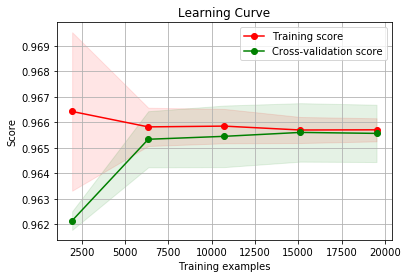

In [27]:
title = 'Learning Curve' # (SVM, gamma=%.6f)' %classifier.best_estimator_.gamma
plot_learning_curve(svc, title, feat_train, labels_train, cv=4)
plt.show()


In [29]:
#Load unknown image

In [33]:
import nibabel as nib
flair_path = './Data/test/004.flair_2t1_2mni_coreg_n4_brain.nii.gz'
t1_path = './Data/test/004.anat_t1_2mniWarped_n4_brain.nii.gz'

t1 = nib.load(t1_path).get_data()
flair = nib.load(flair_path).get_data()
nflair = flair / np.mean(flair[np.nonzero(flair)])
nt1 = t1 / np.mean(t1[np.nonzero(flair)])

In [34]:
test_feats = np.concatenate

numpy.ndarray

In [39]:
np.shape(flair)

(182, 218, 182)

In [65]:
test = np.stack((np.reshape(nt1,-1), np.reshape(nflair,-1)))
np.shape(test)

(2, 7221032)

In [68]:
prediction = svc.predict(test.transpose())

In [69]:
np.sum(prediction)

61287.0

In [70]:
np.shape(prediction)

(7221032,)

In [71]:
182*218*182

7221032

In [73]:
pred_values = np.reshape(prediction,(182,218,182))

In [74]:
np.shape(pred_values)

(182, 218, 182)

In [75]:
wmh_pred = nib.load('./Data/test/wmh.nii.gz')

In [78]:
wmh_data = wmh_pred.get_data()

In [79]:
wmh_data = pred_values

In [81]:
nib.save(nib.Nifti1Image(pred_values, None), './Data/test/wmh_pred.nii.gz')